# NBA Shots Dataset Cleaning and Preprocessing

This notebook outlines the comprehensive steps taken to clean and preprocess the NBA shots dataset, spanning the years 2019 to 2023. The dataset encompasses a wide array of features related to shots taken during NBA games, including player and team information, shot positions, and game contexts. The initial phase of cleaning ensures the data is accurate and free of anomalies, while the subsequent preprocessing phase transforms the data into a structured format, suitable for exploratory data analysis and machine learning modeling.

## Setup

Import necessary libraries and configure the environment for the data cleaning and preprocessing tasks.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

## Data Loading

Load the NBA shots data from CSV files for the years 2019 to 2023 and combine them into a single DataFrame.

In [2]:
years = [2019, 2020, 2021, 2022, 2023]
dfs = {'combined': pd.DataFrame()}  # Initialize a combined DataFrame

for year in years:
    file_path = f"data/NBA_{year}_Shots.csv"
    try:
        df = pd.read_csv(file_path)
        dfs[year] = df  # Store the DataFrame in the dictionary
        dfs['combined'] = pd.concat([dfs['combined'], df], ignore_index=True)  # Update the combined DataFrame
    except FileNotFoundError:
        print(f"The file 'NBA_{year}_Shots.csv' for {year} does not exist.")


# To select a specific year (e.g., 2020), you can access it like this:
df2019 = dfs[2019]
df2020 = dfs[2020]
df2021 = dfs[2021]
df2022 = dfs[2022]
df2023 = dfs[2023]

# To select the combined data, you can access it like this:
dfcombined = dfs['combined']

## Data Cleaning

Identify and handle missing values in the dataset to ensure data quality for analysis.


In [3]:
# Check for missing values in each column
missing_values = dfcombined.isnull().sum()

# Print columns with missing values and their respective counts
print(missing_values[missing_values > 0])

POSITION_GROUP    5305
POSITION          5305
dtype: int64


In [4]:
# Handling missing values: Check the percentage of missing values in 'POSITION_GROUP' and 'POSITION'
missing_values_percentage = dfcombined[['POSITION_GROUP', 'POSITION']].isnull().mean() * 100

# Handling duplicate rows: Check for any duplicate rows in the data
duplicate_rows = dfcombined.duplicated().sum()

# Output the percentage of missing values and the number of duplicate rows
(missing_values_percentage, duplicate_rows)

(POSITION_GROUP    0.513802
 POSITION          0.513802
 dtype: float64,
 60)

In [5]:
# Detect outliers using Z-score

# Outlier detection for 'LOC_X'
z_scores_loc_x = np.abs(stats.zscore(dfcombined['LOC_X']))
outliers_loc_x = np.where(z_scores_loc_x > 3)
print(f"There are {len(outliers_loc_x[0])} outliers in the 'LOC_X' column.")

# Outlier detection for 'LOC_Y'
z_scores_loc_y = np.abs(stats.zscore(dfcombined['LOC_Y']))
outliers_loc_y = np.where(z_scores_loc_y > 3)
print(f"There are {len(outliers_loc_y[0])} outliers in the 'LOC_Y' column.")

# Outlier detection for 'SHOT_DISTANCE'
z_scores_shot_distance = np.abs(stats.zscore(dfcombined['SHOT_DISTANCE']))
outliers_shot_distance = np.where(z_scores_shot_distance > 3)
print(f"There are {len(outliers_shot_distance[0])} outliers in the 'SHOT_DISTANCE' column.")

There are 45957 outliers in the 'LOC_X' column.
There are 8780 outliers in the 'LOC_Y' column.
There are 1749 outliers in the 'SHOT_DISTANCE' column.


C:\Users\varad\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


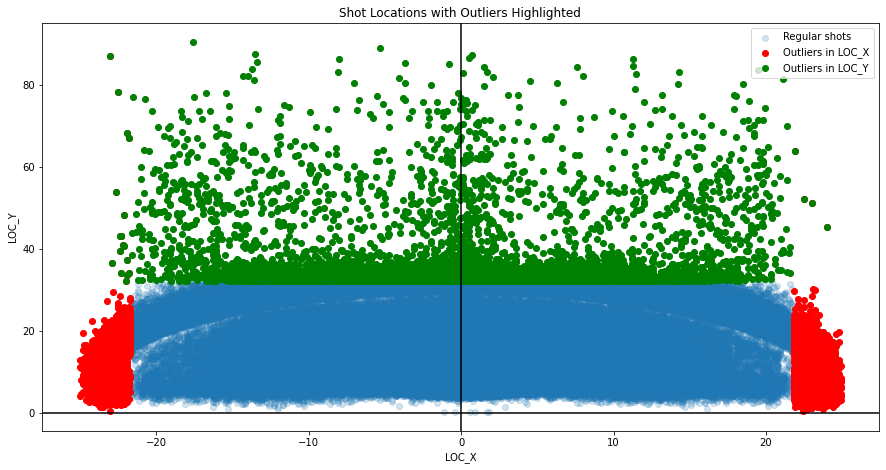

In [6]:
import matplotlib.pyplot as plt

# Plotting LOC_X and LOC_Y to visualize shot locations
plt.figure(figsize=(15, 7.5))
# Plot a scatter plot of LOC_X and LOC_Y where the shots are made
plt.scatter(dfcombined['LOC_X'], dfcombined['LOC_Y'], alpha=0.2, label='Regular shots')
# Highlight the outliers
plt.scatter(dfcombined.loc[outliers_loc_x]['LOC_X'], dfcombined.loc[outliers_loc_x]['LOC_Y'], color='red', label='Outliers in LOC_X')
plt.scatter(dfcombined.loc[outliers_loc_y]['LOC_X'], dfcombined.loc[outliers_loc_y]['LOC_Y'], color='green', label='Outliers in LOC_Y')
plt.axhline(y=0, color='k')  # Add a line for the basket
plt.axvline(x=0, color='k')  # Center court line
plt.xlabel('LOC_X')
plt.ylabel('LOC_Y')
plt.title('Shot Locations with Outliers Highlighted')
plt.legend()
plt.show()

In [7]:
# Identify unique player names associated with each player ID
player_id_name = dfcombined.groupby('PLAYER_ID')['PLAYER_NAME'].unique()

# Identify player IDs with more than one associated name
inconsistent_players = player_id_name[player_id_name.apply(len) > 1]
print("Inconsistent Player IDs and names:")
print(inconsistent_players)

# Identify unique team names associated with each team ID
team_id_name = dfcombined.groupby('TEAM_ID')['TEAM_NAME'].unique()

# Identify team IDs with more than one associated name
inconsistent_teams = team_id_name[team_id_name.apply(len) > 1]
print("\nInconsistent Team IDs and names:")
print(inconsistent_teams)

Inconsistent Player IDs and names:
PLAYER_ID
1628384                   [O.G. Anunoby, OG Anunoby]
1628408                     [P.J. Dozier, PJ Dozier]
1630197    [Alekesej Pokusevski, Aleksej Pokusevski]
1630214         [Xavier Tillman Sr., Xavier Tillman]
1630288               [Jeff Dowtin, Jeff Dowtin Jr.]
1630527         [Brandon Boston, Brandon Boston Jr.]
Name: PLAYER_NAME, dtype: object

Inconsistent Team IDs and names:
TEAM_ID
1610612746    [LA Clippers, Los Angeles Clippers]
Name: TEAM_NAME, dtype: object


#### Analysis and Handling of Data Quality Issues
In the process of ensuring data quality for our NBA shots dataset, we have identified and addressed the following issues:

- Missing Values: The POSITION_GROUP and POSITION columns contain missing values, accounting for about 0.51% of the data. Due to the minimal impact, these rows have been removed.
- Duplicates: There are 60 instances of duplicate records. To maintain the dataset's integrity, these duplicates have been eliminated.
- Outliers: The LOC_X, LOC_Y, and SHOT_DISTANCE columns contain outliers. However, these values fall within the expected range of a basketball court and represent valid shot attempts, including less common long-range shots. Therefore, these outliers have been retained as they are crucial for a realistic representation of shot distribution.
- Inconsistent Player Names: The PLAYER ID and TEAM_ID columns had different ways of representing the same name

In [8]:
# Drop the duplicate rows
dfcombined_cleaned = dfcombined.drop_duplicates()

# Since the percentage of missing values is small, we will drop the rows with missing 'POSITION_GROUP' and 'POSITION'
dfcombined_cleaned = dfcombined_cleaned.dropna(subset=['POSITION_GROUP', 'POSITION'])

# Corrections for player names
player_name_corrections = {
    1630197: "Aleksej Pokusevski",
    1630527: "Brandon Boston Jr.",
    1628408: "PJ Dozier",
    1628384: "OG Anunoby",
    1630214: "Xavier Tillman Sr.",
    1630288: "Jeff Dowtin Jr."
}

# Apply the corrections for player names
dfcombined_cleaned['PLAYER_NAME'] = dfcombined_cleaned.apply(lambda row: player_name_corrections[row['PLAYER_ID']] if row['PLAYER_ID'] in player_name_corrections else row['PLAYER_NAME'], axis=1)

# Corrections for team names
team_name_corrections = {
    "LA Clippers": "Los Angeles Clippers"
}

# Apply the corrections for team names
dfcombined_cleaned['TEAM_NAME'] = dfcombined_cleaned['TEAM_NAME'].replace(team_name_corrections)

# Verify player name corrections
print("Corrected Player IDs and names:")
print(df.groupby('PLAYER_ID')['PLAYER_NAME'].unique())

# Verify team name corrections
print("\nCorrected Team IDs and names:")
print(df.groupby('TEAM_ID')['TEAM_NAME'].unique())

# Check if the cleaning was successful
cleaning_check = {
    "Remaining duplicates": dfcombined_cleaned.duplicated().sum(),
    "Remaining missing values": dfcombined_cleaned[['POSITION_GROUP', 'POSITION']].isnull().sum()
}

cleaning_check

Corrected Player IDs and names:
PLAYER_ID
2544             [LeBron James]
2617            [Udonis Haslem]
2738           [Andre Iguodala]
101108             [Chris Paul]
200752               [Rudy Gay]
                   ...         
1631323     [Simone Fontecchio]
1631367         [Jacob Gilyard]
1631466    [Jeenathan Williams]
1631495      [Donovan Williams]
1641645          [Xavier Cooks]
Name: PLAYER_NAME, Length: 537, dtype: object

Corrected Team IDs and names:
TEAM_ID
1610612737             [Atlanta Hawks]
1610612738            [Boston Celtics]
1610612739       [Cleveland Cavaliers]
1610612740      [New Orleans Pelicans]
1610612741             [Chicago Bulls]
1610612742          [Dallas Mavericks]
1610612743            [Denver Nuggets]
1610612744     [Golden State Warriors]
1610612745           [Houston Rockets]
1610612746               [LA Clippers]
1610612747        [Los Angeles Lakers]
1610612748                [Miami Heat]
1610612749           [Milwaukee Bucks]
1610612750    

{'Remaining duplicates': 0,
 'Remaining missing values': POSITION_GROUP    0
 POSITION          0
 dtype: int64}

## Data Preprocessing

##### Feature Description

Before transforming our features to be suitable for machine learning algorithms, let's summarize the characteristics of our numeric and categorical variables post-cleaning:

###### **Numeric Variables**
- There are 1,027,134 entries after cleaning.
- The SEASON_1 column, which seems to represent the year, ranges from 2019 to 2023.
- The SHOT_DISTANCE ranges from 0 to 88 feet, with a mean of approximately 13.5 feet.
- LOC_X and LOC_Y seem to represent the coordinates of the shot, with means close to 0, indicating that shots are spread around the basket.
- QUARTER ranges from 1 to 8, which may include overtime quarters.
- MINS_LEFT and SECS_LEFT show the time left in the quarter when the shot was taken.
###### **Categorical Variables**
- The dataset spans 5 seasons (SEASON_2), with '2018-19' being the most frequent season represented.
- TEAM_NAME and PLAYER_NAME have 31 and 948 unique entries, respectively, indicating the teams and players involved in the shots.
- Most shots were taken by guards (POSITION_GROUP) and specifically shooting guards (POSITION).
- The most common EVENT_TYPE is 'Missed Shot', which corresponds with the SHOT_MADE boolean column where False (missed shot) is more common than True (made shot).
- ACTION_TYPE has 48 unique types with 'Jump Shot' being the most common.
- The SHOT_TYPE indicates whether it was a 2-point or 3-point field goal.
- The BASIC_ZONE, ZONE_NAME, and ZONE_ABB columns describe the court area from which the shot was taken, with 'Restricted Area' and 'Center' being the most common zones.
- The ZONE_RANGE describes the distance category of the shot, with 'Less Than 8 ft.' being the most frequent.

#### Feature Transformation & Engineering

In this section, we map the categorical identifiers such as team IDs, player IDs, and zone abbreviations to their respective names for better interpretability. Additionally, we create a binary `IS_HOME_TEAM` column to indicate whether the team is playing at home, which simplifies the feature and reduces memory usage for future processing. This step is crucial for preparing the dataset for machine learning models, as it converts textual categorical data into a numerical format that can be easily processed by algorithms.

In [9]:
# Mapping Players & Teams with their IDs and zone names with its abbreviaton 

# Extract unique team IDs
unique_team_ids = dfcombined_cleaned['TEAM_ID'].unique()

# Extract unique team names
unique_team_names = dfcombined_cleaned['TEAM_NAME'].unique()

# Extract unique team abbreviations from the 'HOME_TEAM' column
unique_home_teams = dfcombined_cleaned['HOME_TEAM'].unique()

# Extract unique player IDs
unique_player_ids = dfcombined_cleaned['PLAYER_ID'].unique()

# Extract unique player names
unique_player_names = dfcombined_cleaned['PLAYER_NAME'].unique()

# Extract unique zone names
unique_zone_names = dfcombined_cleaned['ZONE_NAME'].unique()

# Extract unique zone abbreviations
unique_zone_abb = dfcombined_cleaned['ZONE_ABB'].unique()

In [10]:
# Creating a Is_Home_Team binary column in order to not double count the home/away feature and making it a numerical to save 
# memory + easier for future usage

# Mapping dictionaries to convert team, player identifiers and zone names to names and abbreviations.
team_id_to_name_mapping = dict(zip(unique_team_ids, unique_team_names))
team_abbreviation_to_id_mapping = dict(zip(unique_home_teams, unique_team_ids))
player_id_to_name_mapping = dict(zip(unique_player_ids, unique_player_names))
zone_abb_to_zonename_mapping = dict(zip(unique_zone_abb, unique_zone_names))

# Mapping team abbreviations to numeric team IDs for the 'HOME_TEAM' column.
team_abbr_to_id = {
    'LAC': 1610612762, 'ATL': 1610612746, 'MIL': 1610612737,
    'BKN': 1610612754, 'SAS': 1610612760, 'MEM': 1610612749,
    'NYK': 1610612751, 'PHI': 1610612748, 'DEN': 1610612742,
    'CHA': 1610612759, 'POR': 1610612744, 'DAL': 1610612752,
    'UTA': 1610612763, 'MIA': 1610612765, 'OKC': 1610612741,
    'LAL': 1610612750, 'DET': 1610612755, 'WAS': 1610612743,
    'MIN': 1610612766, 'NOP': 1610612753, 'CHI': 1610612758,
    'CLE': 1610612757, 'GSW': 1610612756, 'TOR': 1610612745,
    'SAC': 1610612747, 'BOS': 1610612764, 'HOU': 1610612738,
    'IND': 1610612761, 'ORL': 1610612740, 'PHX': 1610612739
}

# Apply the mapping to the 'HOME_TEAM' column to create a 'Home_Team_ID' column.
dfcombined_cleaned['Home_Team_ID'] = dfcombined_cleaned['HOME_TEAM'].map(team_abbr_to_id)

# Determine if the team is playing at home and encode this in a new 'Is_Home_Team' column.
dfcombined_cleaned['IS_HOME_TEAM'] = (dfcombined_cleaned['Home_Team_ID'] == dfcombined_cleaned['TEAM_ID']).astype(int)

# The DataFrame dfcombined_cleaned now has a binary 'Is_Home_Team' column indicating home (1) and away (0) games.
dfcombined_cleaned

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,Home_Team_ID,IS_HOME_TEAM
0,2019,2018-19,1610612762,Utah Jazz,1628960,Grayson Allen,G,SG,04-10-2019,21801229,...,R,24+ ft.,-22.2,12.15,23,5,0,18,1610612762,1
1,2019,2018-19,1610612746,Los Angeles Clippers,1627820,Tyrone Wallace,G,PG,04-10-2019,21801229,...,C,8-16 ft.,-2.3,16.85,11,5,0,27,1610612762,0
2,2019,2018-19,1610612737,Atlanta Hawks,1627752,Taurean Prince,F,SF,04-10-2019,21801220,...,C,24+ ft.,0.4,37.25,32,4,0,2,1610612746,0
3,2019,2018-19,1610612762,Utah Jazz,1628513,Naz Mitrou-Long,G,SG,04-10-2019,21801229,...,C,Less Than 8 ft.,-1.3,7.05,2,5,0,46,1610612762,1
4,2019,2018-19,1610612746,Los Angeles Clippers,203210,JaMychal Green,F,PF,04-10-2019,21801229,...,RC,24+ ft.,-19.1,20.75,24,5,0,55,1610612762,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032494,2023,2022-23,1610612737,Atlanta Hawks,1631495,Donovan Williams,G,SG,04-09-2023,22201216,...,C,Less Than 8 ft.,-2.1,7.45,3,4,1,37,1610612764,0
1032495,2023,2022-23,1610612737,Atlanta Hawks,1631495,Donovan Williams,G,SG,04-09-2023,22201216,...,RC,24+ ft.,-14.5,26.45,25,4,1,12,1610612764,0
1032496,2023,2022-23,1610612737,Atlanta Hawks,1628981,Bruno Fernando,C,C,04-09-2023,22201216,...,C,Less Than 8 ft.,2.0,7.55,3,4,1,2,1610612764,0
1032497,2023,2022-23,1610612737,Atlanta Hawks,1628981,Bruno Fernando,C,C,04-09-2023,22201216,...,C,24+ ft.,0.2,30.85,25,4,0,28,1610612764,0


#### Date Feature Engineering
The GAME_DATE column is converted to a datetime object to extract additional features that may be relevant for analysis, such as the day of the week and month of the game. The year is already given in SEASON_1 column.

In [11]:
# Converting 'GAME_DATE' column to a datetime object and extracting relevant features (year not needed = SEASON_1)
dfcombined_cleaned['GAME_DATE'] = pd.to_datetime(dfcombined_cleaned['GAME_DATE'])

# Extracting the month as a number (1-12)
dfcombined_cleaned['MONTH'] = dfcombined_cleaned['GAME_DATE'].dt.month

# Extracting the day of the month as a number (1-31)
dfcombined_cleaned['DAY'] = dfcombined_cleaned['GAME_DATE'].dt.day

# Extracting the day of the week as a number (1-7, where Monday=1, Sunday=7)
dfcombined_cleaned['WEEKDAY'] = dfcombined_cleaned['GAME_DATE'].dt.dayofweek + 1

dfcombined_cleaned

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,Home_Team_ID,IS_HOME_TEAM,MONTH,DAY,WEEKDAY
0,2019,2018-19,1610612762,Utah Jazz,1628960,Grayson Allen,G,SG,2019-04-10,21801229,...,12.15,23,5,0,18,1610612762,1,4,10,3
1,2019,2018-19,1610612746,Los Angeles Clippers,1627820,Tyrone Wallace,G,PG,2019-04-10,21801229,...,16.85,11,5,0,27,1610612762,0,4,10,3
2,2019,2018-19,1610612737,Atlanta Hawks,1627752,Taurean Prince,F,SF,2019-04-10,21801220,...,37.25,32,4,0,2,1610612746,0,4,10,3
3,2019,2018-19,1610612762,Utah Jazz,1628513,Naz Mitrou-Long,G,SG,2019-04-10,21801229,...,7.05,2,5,0,46,1610612762,1,4,10,3
4,2019,2018-19,1610612746,Los Angeles Clippers,203210,JaMychal Green,F,PF,2019-04-10,21801229,...,20.75,24,5,0,55,1610612762,0,4,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032494,2023,2022-23,1610612737,Atlanta Hawks,1631495,Donovan Williams,G,SG,2023-04-09,22201216,...,7.45,3,4,1,37,1610612764,0,4,9,7
1032495,2023,2022-23,1610612737,Atlanta Hawks,1631495,Donovan Williams,G,SG,2023-04-09,22201216,...,26.45,25,4,1,12,1610612764,0,4,9,7
1032496,2023,2022-23,1610612737,Atlanta Hawks,1628981,Bruno Fernando,C,C,2023-04-09,22201216,...,7.55,3,4,1,2,1610612764,0,4,9,7
1032497,2023,2022-23,1610612737,Atlanta Hawks,1628981,Bruno Fernando,C,C,2023-04-09,22201216,...,30.85,25,4,0,28,1610612764,0,4,9,7


#### Creation of TIME_LEFT Column

The `TOTAL_TIME_LEFT` column is computed by converting the minutes left (`MINS_LEFT`) to seconds and adding the remaining seconds (`SECS_LEFT`). This transformation facilitates the analysis of time-related patterns in the data by representing the time left in the game as a single numeric value in seconds.


In [12]:
# Convert 'MINS_LEFT' to seconds and add 'SECS_LEFT' to create 'TOTAL_TIME_LEFT' in seconds (including overtime)

dfcombined_cleaned['TOTAL_TIME_LEFT'] = dfcombined_cleaned.apply(
    lambda row: (((4 - row['QUARTER']) * 12 * 60) + (row['MINS_LEFT'] * 60) + row['SECS_LEFT']) 
    if row['QUARTER'] <= 4 
    else ((row['MINS_LEFT'] * 60) + row['SECS_LEFT']), axis=1)

# Re-display the first few rows to check the changes
dfcombined_cleaned[['QUARTER', 'MINS_LEFT', 'SECS_LEFT', 'TOTAL_TIME_LEFT']].head(15)

### Feature Reduction and Type Conversion

##### Reducing Redundant Features
To streamline the dataset, redundant or unnecessary features are removed. This includes dropping columns that are represented by other, more effective identifiers or that have been encoded into new features.

##### Columns Dropped
- `PLAYER_NAME` and `TEAM_NAME` are removed in favor of `PLAYER_ID` and `TEAM_ID`.
- `SEASON_2` is redundant due to `SEASON_1`, which will also be renamed to `SEASON` .
- `ZONE_NAME` is represented by `ZONE_ABB`.
- `EVENT_TYPE` is captured by the binary `SHOT_MADE`.
- `Game_ID` is excluded because it is specific to past games and will not be applicable for future shot predictions. It merely indicates that shots were taken in the same game, which is not useful for our predictive modeling.
- `Home_Team_ID`, `HOME_TEAM`, and `AWAY_TEAM` are removed as they have been replaced by the binary `Is_Home_Team` column, which simplifies the dataset and avoids duplicative information.
- `MINS_LEFT` and `SECS_LEFT` are consolidated into `TIME_LEFT` in seconds, which makes the original columns unnecessary.
- `GAME_DATE` is already captured in `SEASON`, `Month` and `Day` 

In [13]:
# Drop unecessary columns

dfcombined_cleaned = dfcombined_cleaned.drop(['PLAYER_NAME', 'TEAM_NAME', 'SEASON_2', 'ZONE_NAME', 'EVENT_TYPE', 'GAME_ID', 'Home_Team_ID','HOME_TEAM','AWAY_TEAM', 'MINS_LEFT', 'SECS_LEFT', 'GAME_DATE'], axis=1)

# Rename 'SEASON_1' column to 'SEASON'
dfcombined_cleaned.rename(columns={'SEASON_1': 'SEASON'}, inplace=True)
dfcombined_cleaned

,SEASON,TEAM_ID,PLAYER_ID,POSITION_GROUP,POSITION,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,IS_HOME_TEAM,MONTH,DAY,WEEKDAY,TIME_LEFT
0,2019,1610612762,1628960,G,SG,True,Jump Shot,3PT Field Goal,Right Corner 3,R,24+ ft.,-22.2,12.15,23,5,1,4,10,3,18
1,2019,1610612746,1627820,G,PG,True,Step Back Jump shot,2PT Field Goal,In The Paint (Non-RA),C,8-16 ft.,-2.3,16.85,11,5,0,4,10,3,27
2,2019,1610612737,1627752,F,SF,True,Jump Shot,3PT Field Goal,Above the Break 3,C,24+ ft.,0.4,37.25,32,4,0,4,10,3,2
3,2019,1610612762,1628513,G,SG,True,Driving Bank Hook Shot,2PT Field Goal,Restricted Area,C,Less Than 8 ft.,-1.3,7.05,2,5,1,4,10,3,46
4,2019,1610612746,203210,F,PF,True,Jump Shot,3PT Field Goal,Above the Break 3,RC,24+ ft.,-19.1,20.75,24,5,0,4,10,3,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032494,2023,1610612737,1631495,G,SG,True,Running Layup Shot,2PT Field Goal,Restricted Area,C,Less Than 8 ft.,-2.1,7.45,3,4,0,4,9,7,97
1032495,2023,1610612737,1631495,G,SG,False,Pullup Jump shot,3PT Field Goal,Above the Break 3,RC,24+ ft.,-14.5,26.45,25,4,0,4,9,7,72
1032496,2023,1610612737,1628981,C,C,True,Alley Oop Layup shot,2PT Field Goal,Restricted Area,C,Less Than 8 ft.,2.0,7.55,3,4,0,4,9,7,62
1032497,2023,1610612737,1628981,C,C,False,Jump Shot,3PT Field Goal,Above the Break 3,C,24+ ft.,0.2,30.85,25,4,0,4,9,7,28


#### Type Conversion
Categorical columns are explicitly converted to categorical types to optimize memory usage and improve the performance of machine learning models.

In [14]:
# Convert SHOT_MADE to binary
dfcombined_cleaned['SHOT_MADE'] = dfcombined_cleaned['SHOT_MADE'].astype(int)

# Map SHOT_TYPE to binary
shot_type_mapping = {'2PT Field Goal': 0, '3PT Field Goal': 1}
dfcombined_cleaned['SHOT_TYPE'] = dfcombined_cleaned['SHOT_TYPE'].map(shot_type_mapping)

# Convert SEASON and QUARTER to ordinal
season_order = sorted(dfcombined_cleaned['SEASON'].unique())
quarter_order = sorted(dfcombined_cleaned['QUARTER'].unique())
dfcombined_cleaned['SEASON'] = pd.Categorical(dfcombined_cleaned['SEASON'], categories=season_order, ordered=True)
dfcombined_cleaned['QUARTER'] = pd.Categorical(dfcombined_cleaned['QUARTER'], categories=quarter_order, ordered=True)

# Convert MONTH and WEEKDAY to categorical
dfcombined_cleaned['MONTH'] = dfcombined_cleaned['MONTH'].astype('category')
dfcombined_cleaned['WEEKDAY'] = dfcombined_cleaned['WEEKDAY'].astype('category')

# Leave DAY as numerical unless there's a need to treat it as categorical

# Convert ACTION_TYPE, BASIC_ZONE, ZONE_ABB, and ZONE_RANGE to categorical
categorical_columns = ['PLAYER_ID', 'TEAM_ID', 'ACTION_TYPE', 'BASIC_ZONE', 'ZONE_ABB', 'ZONE_RANGE', 'POSITION_GROUP', 'POSITION']
for col in categorical_columns:
    dfcombined_cleaned[col] = dfcombined_cleaned[col].astype('category')
 
dfcombined_cleaned

,SEASON,TEAM_ID,PLAYER_ID,POSITION_GROUP,POSITION,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,IS_HOME_TEAM,MONTH,DAY,WEEKDAY,TIME_LEFT
0,2019,1610612762,1628960,G,SG,1,Jump Shot,1,Right Corner 3,R,24+ ft.,-22.2,12.15,23,5,1,4,10,3,18
1,2019,1610612746,1627820,G,PG,1,Step Back Jump shot,0,In The Paint (Non-RA),C,8-16 ft.,-2.3,16.85,11,5,0,4,10,3,27
2,2019,1610612737,1627752,F,SF,1,Jump Shot,1,Above the Break 3,C,24+ ft.,0.4,37.25,32,4,0,4,10,3,2
3,2019,1610612762,1628513,G,SG,1,Driving Bank Hook Shot,0,Restricted Area,C,Less Than 8 ft.,-1.3,7.05,2,5,1,4,10,3,46
4,2019,1610612746,203210,F,PF,1,Jump Shot,1,Above the Break 3,RC,24+ ft.,-19.1,20.75,24,5,0,4,10,3,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032494,2023,1610612737,1631495,G,SG,1,Running Layup Shot,0,Restricted Area,C,Less Than 8 ft.,-2.1,7.45,3,4,0,4,9,7,97
1032495,2023,1610612737,1631495,G,SG,0,Pullup Jump shot,1,Above the Break 3,RC,24+ ft.,-14.5,26.45,25,4,0,4,9,7,72
1032496,2023,1610612737,1628981,C,C,1,Alley Oop Layup shot,0,Restricted Area,C,Less Than 8 ft.,2.0,7.55,3,4,0,4,9,7,62
1032497,2023,1610612737,1628981,C,C,0,Jump Shot,1,Above the Break 3,C,24+ ft.,0.2,30.85,25,4,0,4,9,7,28


#### Memory Optimization for Numerical Variables

##### Reducing Data Type Sizes
To enhance computational efficiency and reduce memory usage, numerical columns are cast to more memory-efficient data types. Float64 columns are converted to float32, and int64 columns are converted to int32.

In [15]:
# Convert binary columns to int32
dfcombined_cleaned['SHOT_MADE'] = dfcombined_cleaned['SHOT_MADE'].astype('int32')
dfcombined_cleaned['IS_HOME_TEAM'] = dfcombined_cleaned['IS_HOME_TEAM'].astype('int32')

# Convert other integer columns to int32
dfcombined_cleaned['DAY'] = dfcombined_cleaned['DAY'].astype('int32')
dfcombined_cleaned['TOTAL_TIME_LEFT'] = dfcombined_cleaned['TIME_LEFT'].astype('int32')
dfcombined_cleaned['SHOT_DISTANCE'] = dfcombined_cleaned['SHOT_DISTANCE'].astype('int32')

#### Data Integrity Check

##### Verifying Data Types and Cardinality
After preprocessing, it is crucial to verify that data types are correctly assigned and to understand the cardinality of categorical variables. This step ensures that the dataset is ready for encoding and further analysis.

In [16]:
#checking for Types and amount of unique values

dfcombined_cleaned.info()

# Define the categorical columns to be encoded
categorical_columns = [
    'TEAM_ID', 'PLAYER_ID', 'POSITION_GROUP', 'POSITION',
    'ACTION_TYPE', 'BASIC_ZONE', 'ZONE_ABB', 'ZONE_RANGE', 'MONTH', 'WEEKDAY'
]

for col in categorical_columns:
    print(f"{col}: {dfcombined_cleaned[col].nunique()} unique values")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027134 entries, 0 to 1032498
Data columns (total 20 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   SEASON          1027134 non-null  category
 1   TEAM_ID         1027134 non-null  category
 2   PLAYER_ID       1027134 non-null  category
 3   POSITION_GROUP  1027134 non-null  category
 4   POSITION        1027134 non-null  category
 5   SHOT_MADE       1027134 non-null  int32   
 6   ACTION_TYPE     1027134 non-null  category
 7   SHOT_TYPE       1027134 non-null  int64   
 8   BASIC_ZONE      1027134 non-null  category
 9   ZONE_ABB        1027134 non-null  category
 10  ZONE_RANGE      1027134 non-null  category
 11  LOC_X           1027134 non-null  float64 
 12  LOC_Y           1027134 non-null  float64 
 13  SHOT_DISTANCE   1027134 non-null  int32   
 14  QUARTER         1027134 non-null  category
 15  IS_HOME_TEAM    1027134 non-null  int32   
 16  MONTH           10

### Encoding
#### Ordinal Encoding


In [17]:
# Ensure SEASON is an ordered categorical type
dfcombined_cleaned['SEASON'] = dfcombined_cleaned['SEASON'].cat.as_ordered()

# Define the order for QUARTER, assuming 5, 6, 7, 8 are overtime periods
quarter_mapping = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4', 5: 'OT1', 6: 'OT2', 7: 'OT3', 8: 'OT4'}

# Map the QUARTER column to the ordered categorical type
dfcombined_cleaned['QUARTER'] = dfcombined_cleaned['QUARTER'].map(quarter_mapping).astype('category')

# Set the categories and order for the QUARTER column
dfcombined_cleaned['QUARTER'] = dfcombined_cleaned['QUARTER'].cat.set_categories(
    ['Q1', 'Q2', 'Q3', 'Q4', 'OT1', 'OT2', 'OT3', 'OT4'], ordered=True
)

# Check the conversion
print(dfcombined_cleaned['QUARTER'].head())


0    OT1
1    OT1
2     Q4
3    OT1
4    OT1
Name: QUARTER, dtype: category
Categories (8, object): ['Q1' < 'Q2' < 'Q3' < 'Q4' < 'OT1' < 'OT2' < 'OT3' < 'OT4']


In [18]:
# Check if SEASON is ordered
print("SEASON ordered:", dfcombined_cleaned['SEASON'].cat.ordered)
print("SEASON categories:", dfcombined_cleaned['SEASON'].cat.categories)

# Check if QUARTER is ordered
print("QUARTER ordered:", dfcombined_cleaned['QUARTER'].cat.ordered)
print("QUARTER categories:", dfcombined_cleaned['QUARTER'].cat.categories)


SEASON ordered: True
SEASON categories: Int64Index([2019, 2020, 2021, 2022, 2023], dtype='int64')
QUARTER ordered: True
QUARTER categories: Index(['Q1', 'Q2', 'Q3', 'Q4', 'OT1', 'OT2', 'OT3', 'OT4'], dtype='object')


#### One-Hot Encoding of Categorical Variables

##### Preparing Categorical Variables for Machine Learning
To facilitate the use of categorical data in machine learning models, we apply one-hot encoding. This process converts categorical variables into a binary matrix representation, which is essential for models that require numerical input.

##### Encoding Process
- Initialize the `OneHotEncoder`.
- Fit the encoder to the categorical columns and transform them into a sparse matrix to optimize memory.
- Create a new DataFrame with encoded variables.

##### Integrating Encoded Features
- The original categorical columns are dropped from the cleaned DataFrame.
- The new encoded features are concatenated with the remaining data.
- A final check is performed to ensure no missing values are introduced during this process.


In [19]:
# Define the categorical columns to be encoded
categorical_columns = [
    'TEAM_ID', 'PLAYER_ID', 'POSITION_GROUP', 'POSITION',
    'ACTION_TYPE', 'BASIC_ZONE', 'ZONE_ABB', 'ZONE_RANGE', 'MONTH', 'WEEKDAY'
]

# Initialize the OneHotEncoder with sparse output
encoder = OneHotEncoder(sparse=True, dtype=np.float32)

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(dfcombined_cleaned[categorical_columns])

# Get feature names for the encoded columns
encoded_columns = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_data, columns=encoded_columns)

# Reset the index of the original DataFrame if necessary
dfcombined_cleaned.reset_index(drop=True, inplace=True)

# Reset the index of the encoded DataFrame to match
encoded_df.reset_index(drop=True, inplace=True)

# Drop the original categorical columns from the cleaned DataFrame
dfcombined_cleaned = dfcombined_cleaned.drop(categorical_columns, axis=1)

# Concatenate the encoded DataFrame with the original one, excluding the dropped categorical columns
dfcombined_cleaned = pd.concat([dfcombined_cleaned, encoded_df], axis=1)

# Check the first few rows of the resulting DataFrame
display(dfcombined_cleaned.head())

# Verify that there are no missing values after concatenation
missing_values_after = dfcombined_cleaned.isnull().sum()
print("Missing values after concatenation:\n", missing_values_after)

C:\Users\varad\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,SEASON,SHOT_MADE,SHOT_TYPE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,IS_HOME_TEAM,DAY,TIME_LEFT,...,MONTH_10,MONTH_11,MONTH_12,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6,WEEKDAY_7
0,2019,1,1,-22.2,12.15,23,OT1,1,10,18,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2019,1,0,-2.3,16.85,11,OT1,0,10,27,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2019,1,1,0.4,37.25,32,Q4,0,10,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2019,1,0,-1.3,7.05,2,OT1,1,10,46,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2019,1,1,-19.1,20.75,24,OT1,0,10,55,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Missing values after concatenation:
 SEASON       0
SHOT_MADE    0
SHOT_TYPE    0
LOC_X        0
LOC_Y        0
            ..
WEEKDAY_3    0
WEEKDAY_4    0
WEEKDAY_5    0
WEEKDAY_6    0
WEEKDAY_7    0
Length: 1088, dtype: int64


### Output

After data cleaning, transformation, and optimization, the dataset is now fully preprocessed. We have addressed missing values, removed duplicates, transformed categorical variables into a machine-learning-friendly format using one-hot encoding, and optimized memory usage by adjusting data types. The dataset is now primed for the next phase of our analysis, which involves feature selection and model development. This structured and clean dataset forms a solid foundation for building robust predictive models and extracting meaningful insights

In [22]:
# Define your features and target
X = dfcombined_cleaned.drop(['SHOT_MADE'], axis=1) #features
y = dfcombined_cleaned['SHOT_MADE'] #target

display([y])
X

[0          1
 1          1
 2          1
 3          1
 4          1
           ..
 1027129    1
 1027130    0
 1027131    1
 1027132    0
 1027133    1
 Name: SHOT_MADE, Length: 1027134, dtype: int32]

,SEASON,SHOT_TYPE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,IS_HOME_TEAM,DAY,TIME_LEFT,TEAM_ID_1610612737,...,MONTH_10,MONTH_11,MONTH_12,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6,WEEKDAY_7
0,2019,1,-22.2,12.15,23,OT1,1,10,18,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2019,0,-2.3,16.85,11,OT1,0,10,27,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2019,1,0.4,37.25,32,Q4,0,10,2,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2019,0,-1.3,7.05,2,OT1,1,10,46,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2019,1,-19.1,20.75,24,OT1,0,10,55,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027129,2023,0,-2.1,7.45,3,Q4,0,9,97,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1027130,2023,1,-14.5,26.45,25,Q4,0,9,72,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1027131,2023,0,2.0,7.55,3,Q4,0,9,62,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1027132,2023,1,0.2,30.85,25,Q4,0,9,28,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
dfcombined_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027134 entries, 0 to 1027133
Columns: 1088 entries, SEASON to WEEKDAY_7
dtypes: Sparse[float32, 0](1078), category(2), float64(2), int32(5), int64(1)
memory usage: 123.4 MB


In [21]:
# Save the entire DataFrame to a CSV file
dfcombined_cleaned.to_csv('preprocessed_data.csv', index=False)